In [ ]:
from scipy.stats import qmc
import matplotlib.pyplot as plt
import numpy as np
import random

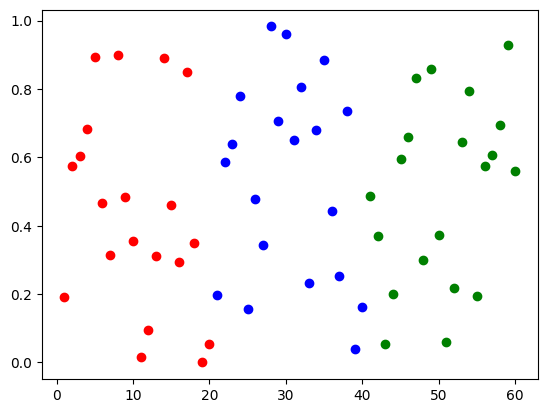

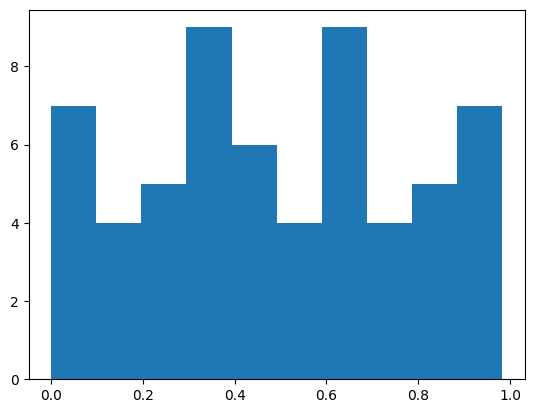

In [52]:
# Q1
def LGC(a,c, m:int, z):
    output = []
    for i in range(m):
        mod = (a*z+c)%m
        output.append(mod/m)
        z = mod
    return output
a=2.7
c=3.2
m=60
z=3.1
output = LGC(a,c,m,z)

plt.scatter(np.arange(1,21,1), output[0:20], color='r')
plt.scatter(np.arange(21,41,1), output[20:40], color='b')
plt.scatter(np.arange(41,61,1), output[40:60], color='g')
plt.show()
plt.hist(output)
plt.show()

There is no significant trend for the data. 

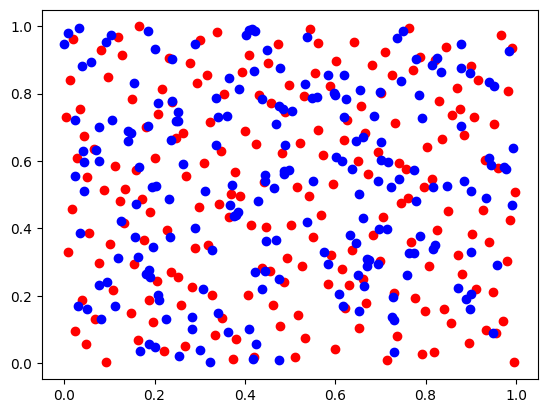

In [4]:
# Q2
sampler = qmc.Sobol(d=2, scramble=True)
sample = sampler.random(200)
sample_builtin = []
for i in range(200):
    sample_builtin +=[[random.uniform(0, 1),random.uniform(0, 1)]]
sample = np.array(sample)
sample_builtin = np.array(sample_builtin)
plt.scatter(sample[:,0], sample[:,1], color='r')
plt.scatter(sample_builtin[:,0],sample_builtin[:,1], color='b')
plt.show()

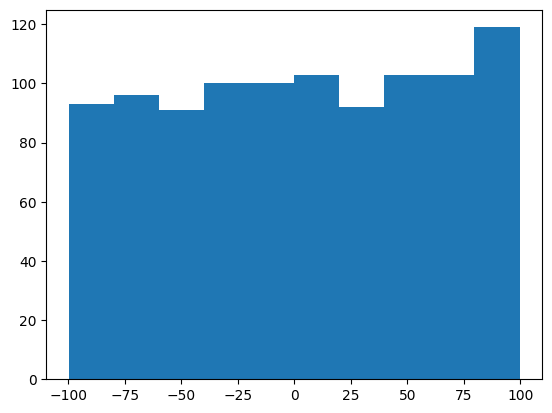

In [6]:
#Q3
# Uniform
def uniform(a,b,N):
    u = np.random.uniform(0,1,N)
    x= a +(b-a)*u
    return x
plt.hist(uniform(-100,100,1000))
plt.show()

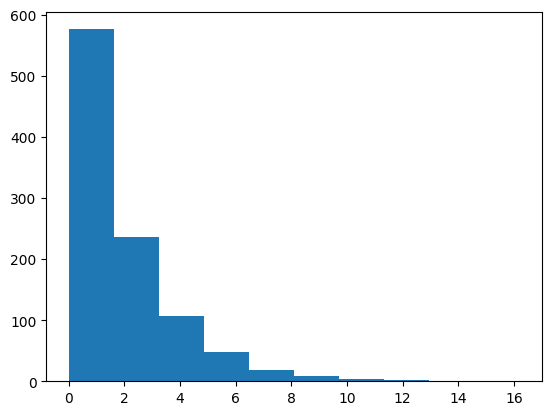

In [12]:
#exponential
def exponential(lamada,N):
    u = np.random.uniform(0, 1, N)
    x = -1*lamada*np.log(u)
    return x
plt.hist(exponential(2,1000))
plt.show()

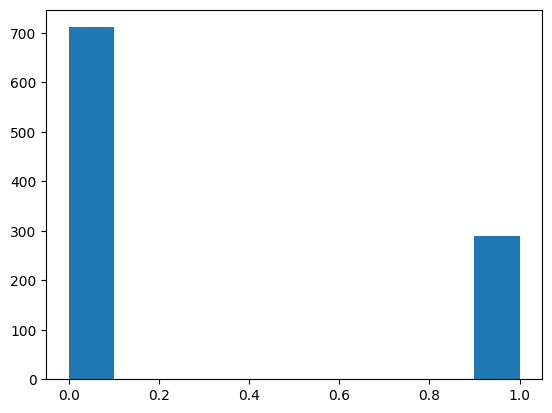

In [13]:
# Bernouli
def Bernouli(p,N):
    u = np.random.uniform(0, 1, N)
    x = []
    for a in u:
        if a<p:
            x.append(1)
        else:
            x.append(0)
    return x
plt.hist(Bernouli(0.3,1000))
plt.show()

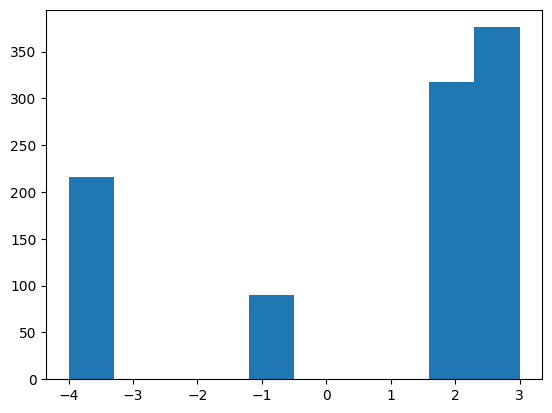

In [15]:
def discrete(p1,p2,p3,p4,N):
    u = np.random.uniform(0, 1, N)
    x = []
    for a in u:
        if a <p1[1]:
            x.append(p1[0])
        elif a <p1[1]+p2[1]:
            x.append(p2[0])
        elif a <p1[1]+p2[1]+p3[1]:
            x.append(p3[0])
        else:
            x.append(p4[0])
    return x
plt.hist(discrete([-1,0.1],[2,0.3],[3,0.4],[-4,0.2],1000))
plt.show()

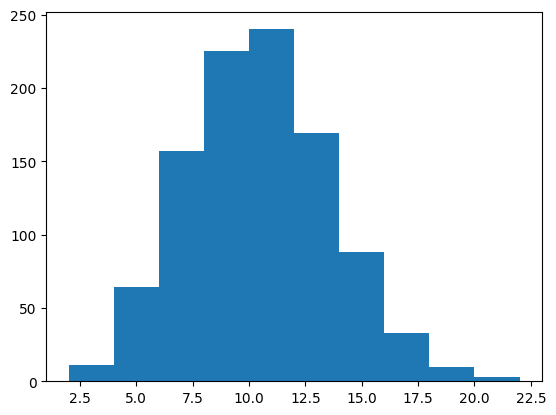

In [23]:
# Q4
#Possion
def possion(lamda,N):
    x=[]
    for i in range(N):
        t = 0
        count = 0
        while t<=1:
            tao = exponential(lamda,1)
            t+=tao
            count+=1
        x.append(count-1)
    return x
plt.hist(possion(0.1,1000))
plt.show()

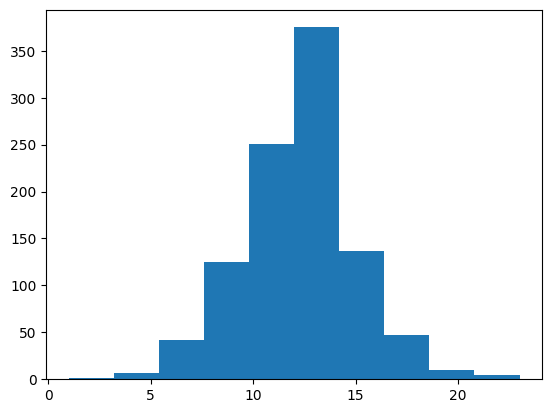

In [27]:
#Binomial
def binomial(n,p,N):
    x=[]

    for a in range(N):
        x.append(sum(Bernouli(p,n)))
    return x
plt.hist(binomial(40,0.3,1000))
plt.show()

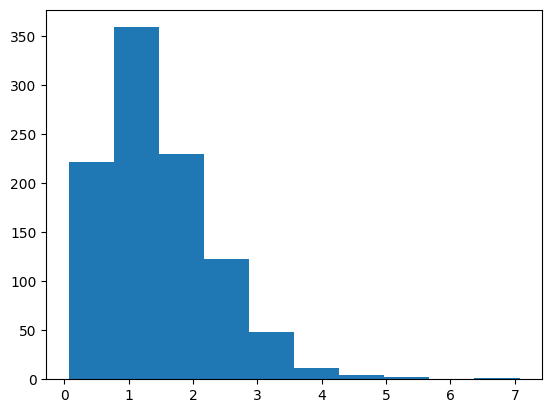

In [32]:
#Gamma
def Gamma(a,b,N):
    x=[]
    for i in range(N):
        x.append(sum(exponential(1/b,a)))
    return x
plt.hist(Gamma(3,2,1000))
plt.show()